# Decision Tree

## Contents

* Introduction
* Algorithm
* Advantages and Disadvantages
* Application on dataset

   * Data Visualization
   * Modeling and Test Model
   * Classification report
* Error Analysis

## Introduction

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

In decision analysis, a decision tree and the closely related influence diagram are used as a visual and analytical decision support tool, where the expected values (or expected utility) of competing alternatives are calculated.

A decision tree consists of three types of nodes:

Decision nodes – typically represented by squares

Chance nodes – typically represented by circles

End nodes – typically represented by triangles


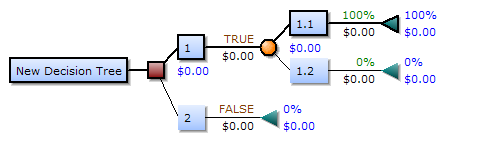




## Algorithm

Here are the steps to construct a decision tree:

1 Gather Data: Collect data related to the problem you are trying to solve. The data should contain information about the features (attributes) of the problem and the target variable (the outcome you are trying to predict).

2 Choose a Splitting Criterion: Choose a splitting criterion for the decision tree. The splitting criterion is used to determine which feature to split on at each node of the tree. Common splitting criteria include information gain, gain ratio, and Gini index.

3 Build the Tree: Start with the root node of the tree and split it based on the chosen splitting criterion. Repeat the process for each child node until the tree is fully grown or a stopping criterion is met.

4 Prune the Tree: Once the tree is fully grown, it may be overfitting the training data. Pruning the tree involves removing nodes that do not improve the accuracy of the tree on the validation set.

5 Evaluate the Tree: Evaluate the performance of the decision tree on the testing data. If the accuracy is not satisfactory, consider changing the splitting criterion or gathering more data to improve the performance.

6 Use the Tree: Once the decision tree is constructed, it can be used to make predictions on new data. Simply follow the path of the tree based on the features of the new data to predict the target variable.



### Information Gain:

Information Gain (IG) is a metric used in decision trees to assess how well a specific characteristic classified the training set of data. The decision tree's root node is chosen as the property with the highest IG.

The predicted entropy of the dataset after splitting on a certain attribute is subtracted from the entropy of the original dataset to calculate IG. A set with only one class has zero entropy, whereas a set with an equal number of examples from each class has maximum entropy. Entropy measures the impurity of a set of examples.


## Advantages and disadvantages

1 It is simple to understand and interpret. People are able to understand decision tree models after a brief explanation.

2 Have value even with little hard data. Important insights can be generated based on experts describing a situation (its alternatives, probabilities, and costs) and their preferences for outcomes.

3 Help determine worst, best, and expected values for different scenarios.

4 Use a white box model. If a given result is provided by a model.

5 Can be combined with other decision techniques.

6 The action of more than one decision-maker can be considered.

## Application On Dataset

First, we import some packages needed.

In [3]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.tree import DecisionTreeClassifier

We need to import model evaluators to evaluate our model from different aspects.

In [4]:
## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Prepare Data

The data contains various attributes related to diabetes, such as Pregnancies, Glucose BloodPressure, SkinThickness, Insulin, BMI, Pedigree, Age and a binary class label indicating whether a patient has diabetes or not.

In [5]:
df = pd.read_csv("/Users/liusiling/Desktop/semester2/577/diabetes.csv") 
df.shape

(768, 9)

## Visualization

In [6]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


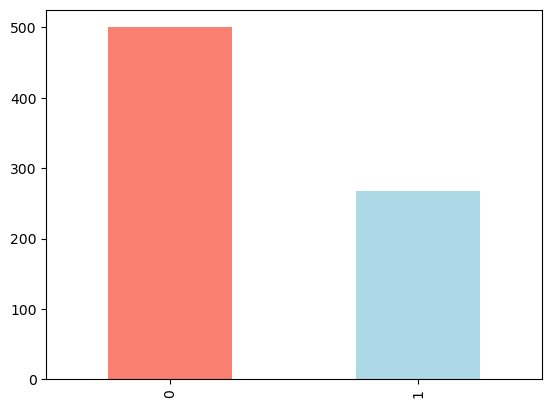

In [7]:
# Plot the value counts with a bar graph
df.Outcome.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 1000x1000 with 0 Axes>

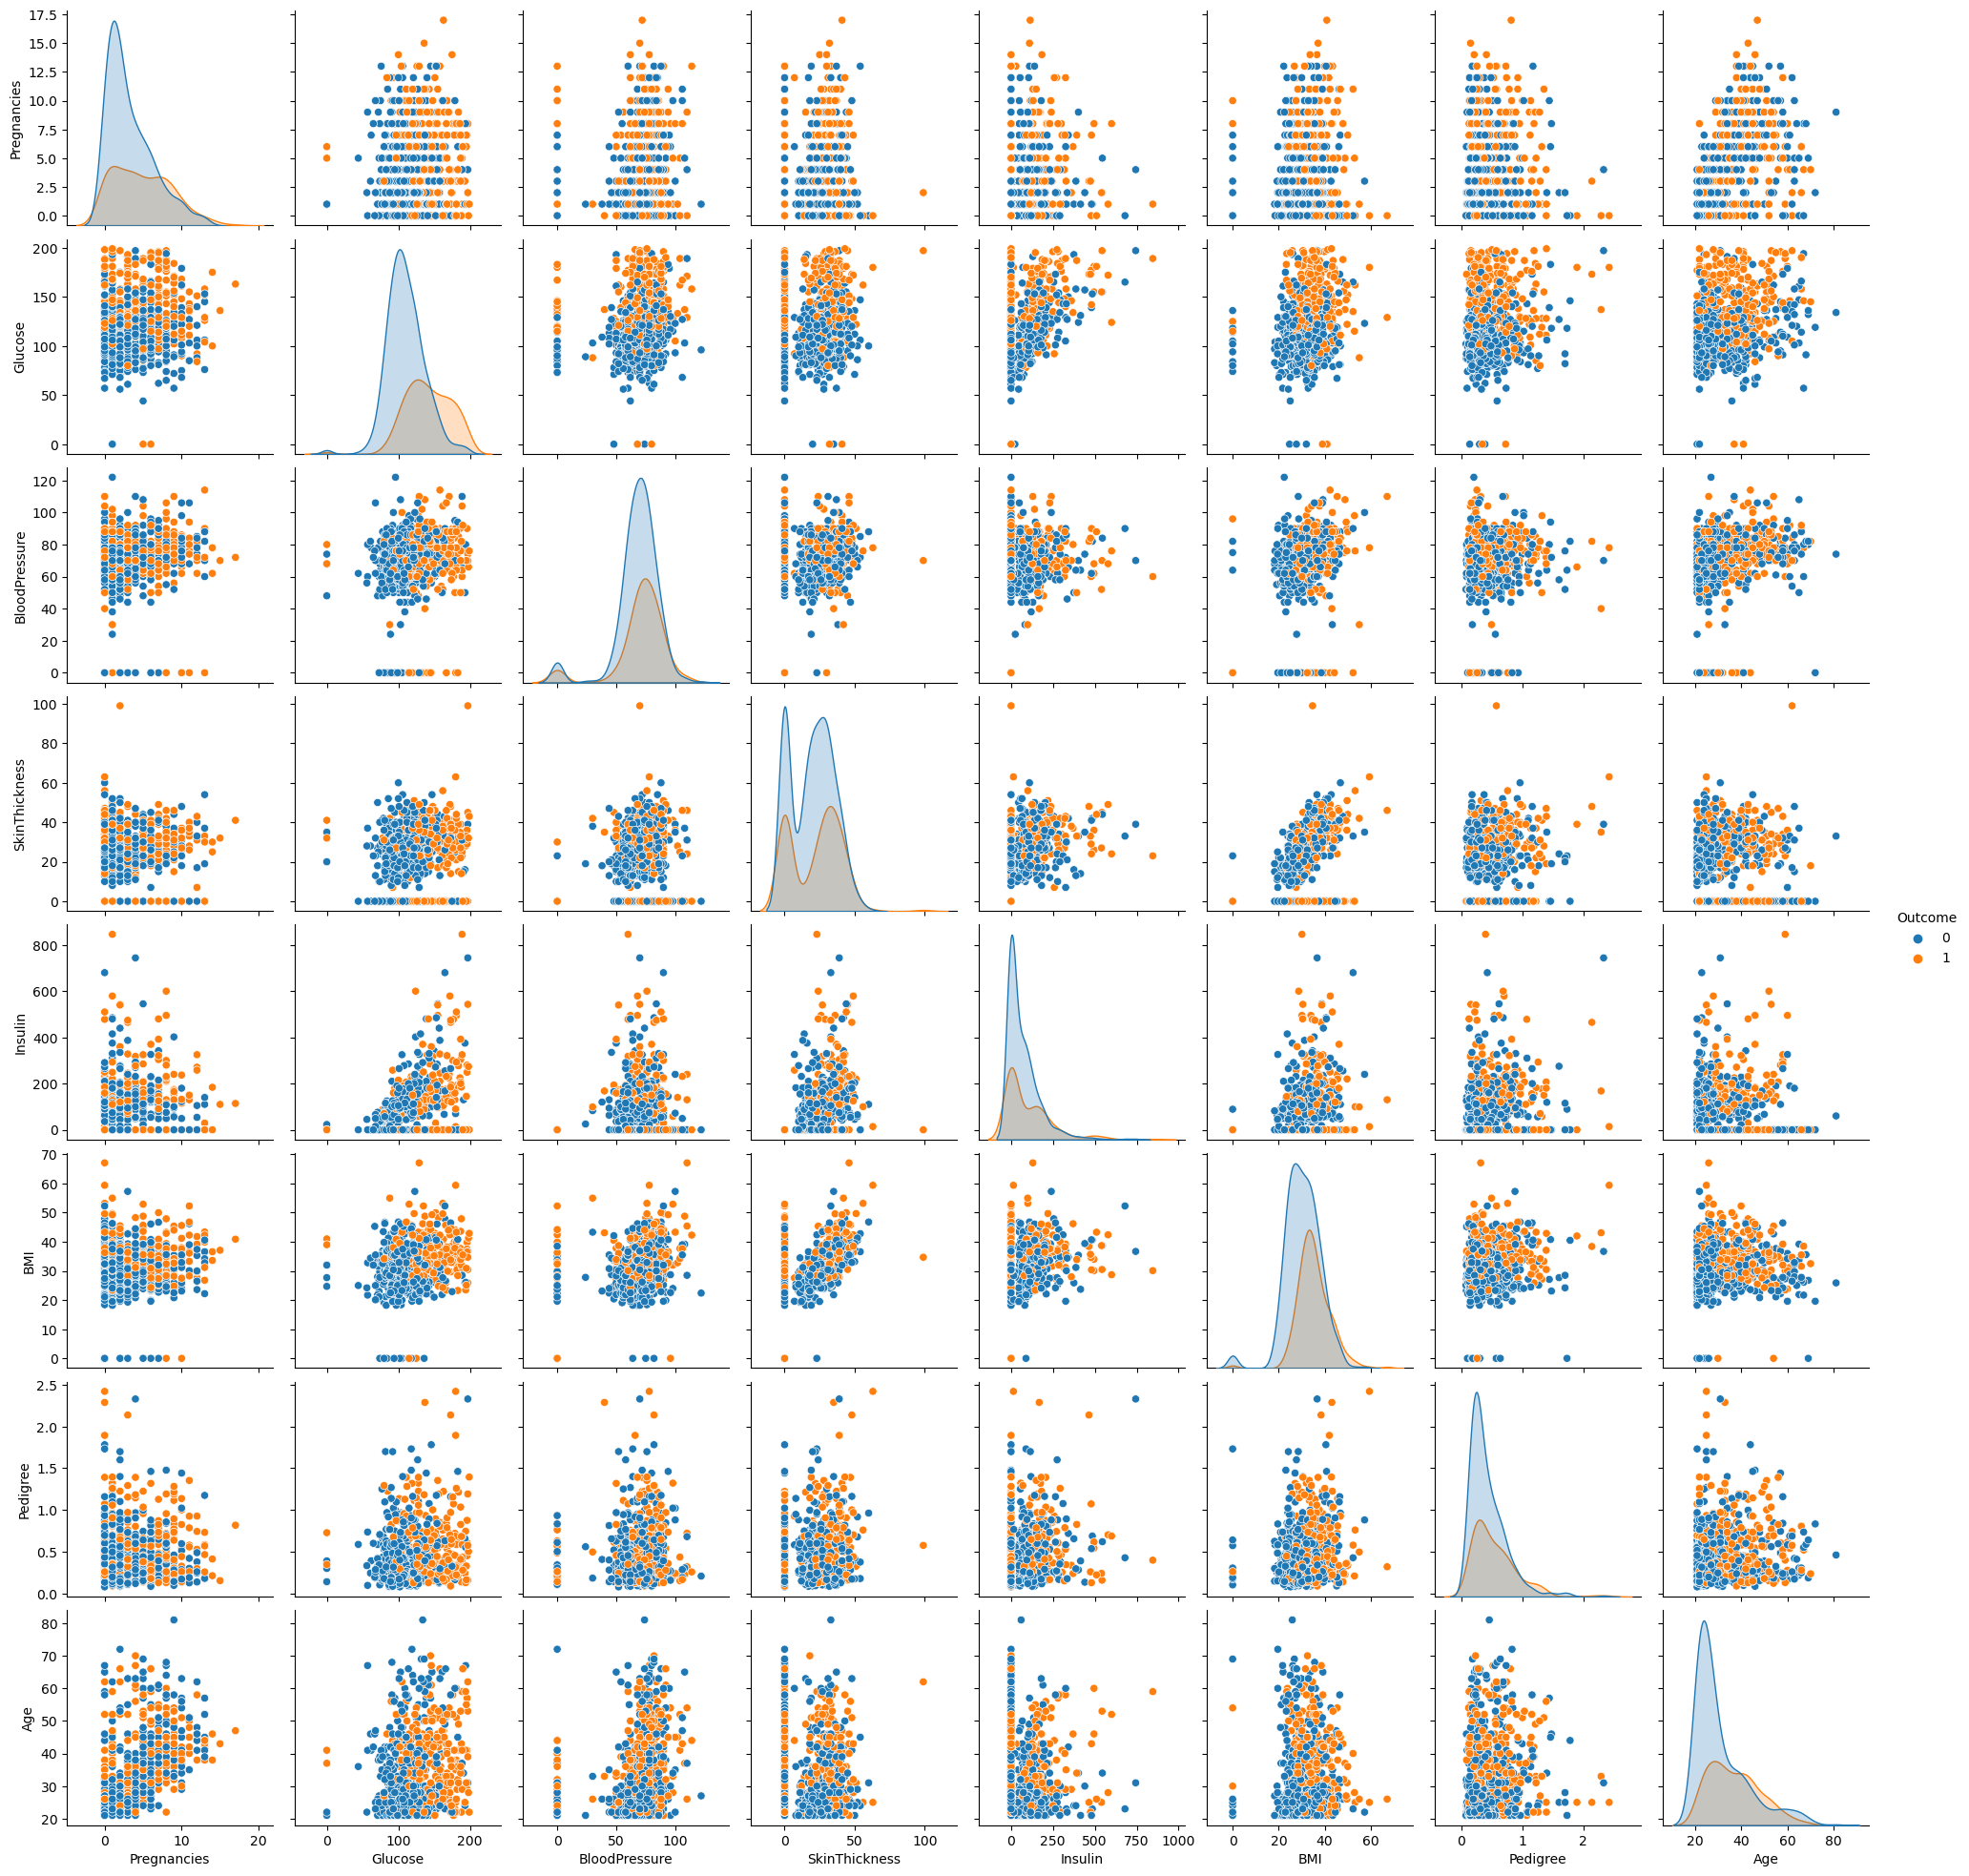

In [10]:
plt.figure(figsize=(10, 10))
sns.pairplot(
    df,
    hue ='Outcome',
    vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','Pedigree','Age'],
    diag_kind='kde',
)
plt.show()

## Modeling

In [17]:
X = df.drop("Outcome", axis=1)

y = df["Outcome"]

In [18]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2) 

In [19]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

### Plot the decision_tree

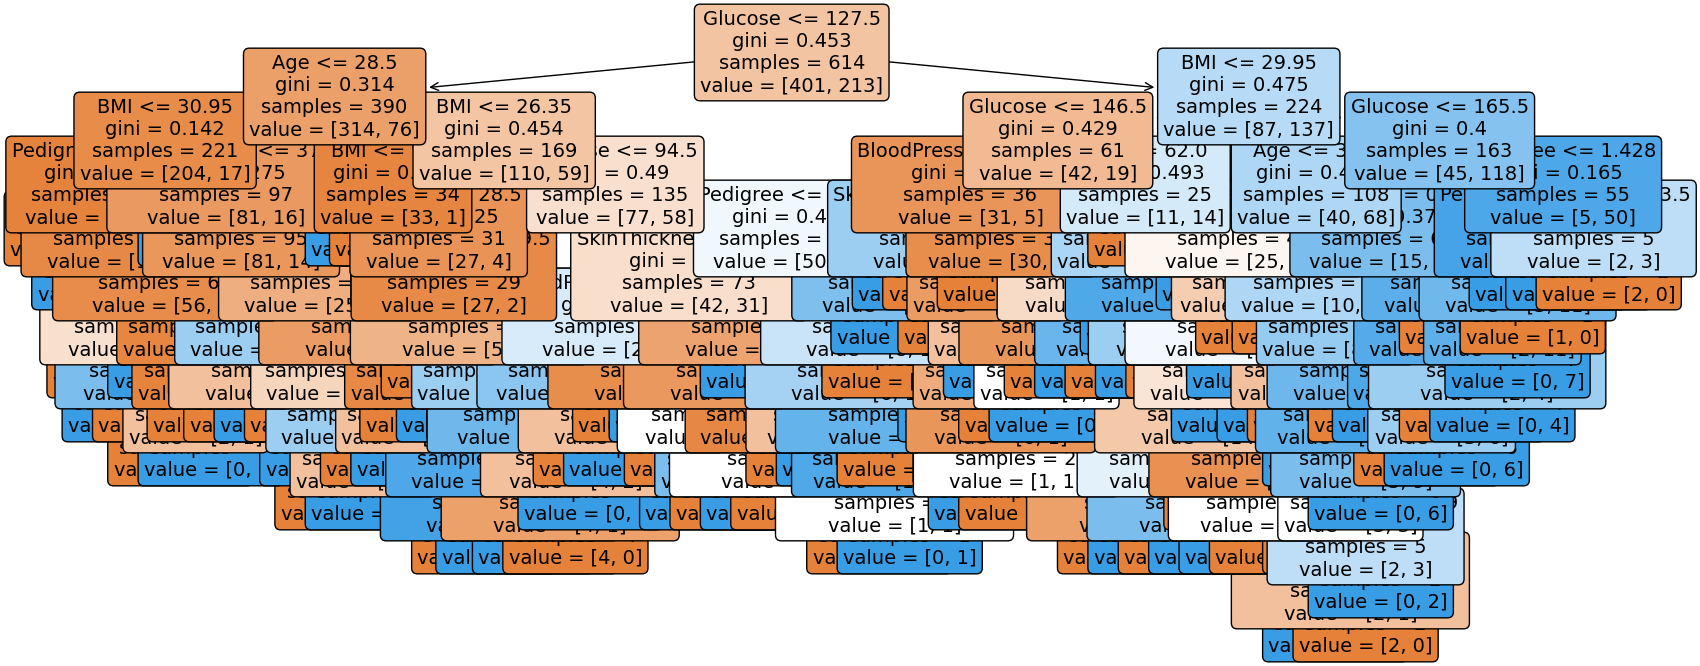

In [21]:
from sklearn import tree

plt.figure (figsize =(20,8))
a = tree.plot_tree (model,
              feature_names = df.columns,
              rounded = True,
              filled = True,
              fontsize =14)
plt.show()

## Test the Model

In [22]:
model.score(X_test, y_test)

0.7597402597402597

Model F1 Score: 0.68
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



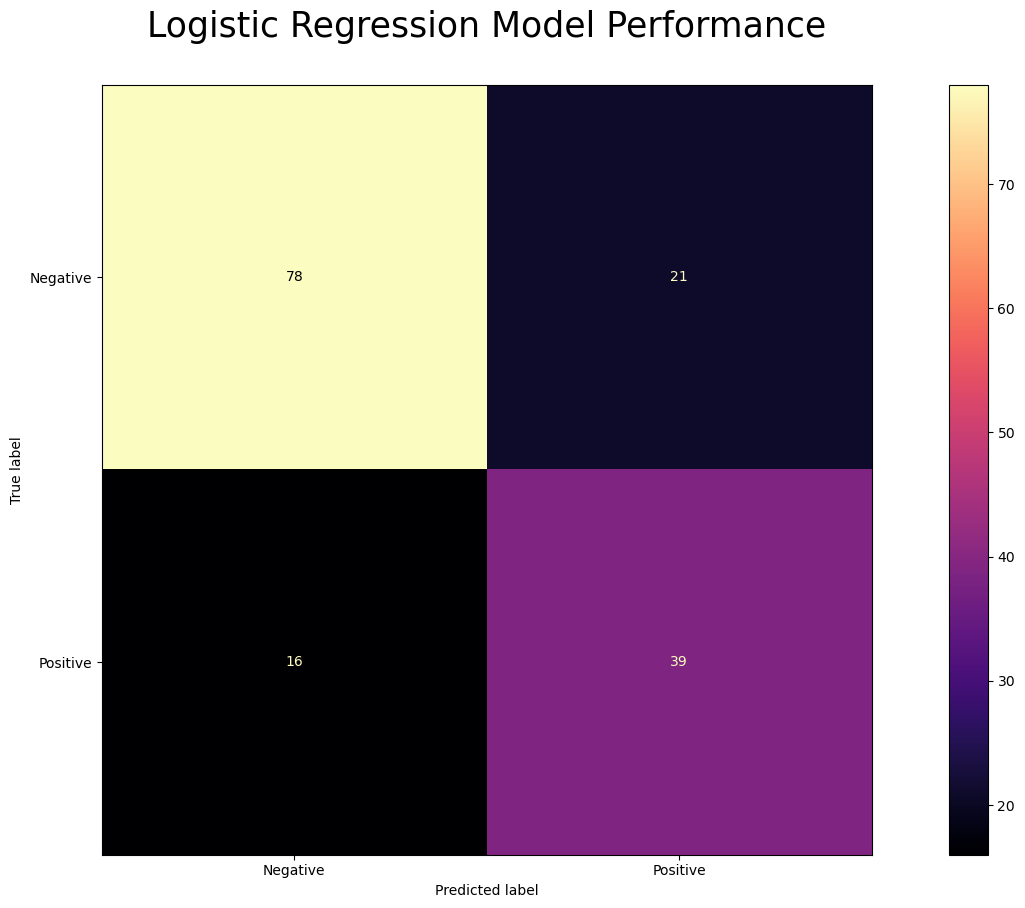

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

y_hat = model.predict(X_test)

print(f"Model F1 Score: {np.round(f1_score(y_test, y_hat),2)}")

labels = ['test1', 'test2']
displabels = ['Negative', 'Positive']

fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.set_title('Logistic Regression Model Performance\n', fontsize = 25)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat, display_labels = displabels, cmap = 'magma', colorbar=True, ax=ax)

print(classification_report(y_test, y_hat))

## Classification report

In [26]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



## Error Analysis

In [24]:
# MSE
MSE = (1/X_test.shape[0])*sum((y_hat - y_test)**2)
print(f"Mean Squared Error: {np.round(MSE,2)}")

# SSE
SSE = sum((y_hat - y_test)**2)
print(f"Sum Squared Error: {np.round(SSE,2)}")

# SST
SST = sum((y_test - np.mean(y_test))**2)
print(f"Sum Squared Total: {np.round(SST,2)}")

# R_2
R_2 = 1-SSE/SST
print(f"R^2: {np.round(R_2,2)}")

Mean Squared Error: 0.24
Sum Squared Error: 37
Sum Squared Total: 35.36
R^2: -0.05
